<div style="overflow:auto;">
    <div style="float:left; margin-right:10px;">
        <img width='120' height='120' src='https://cityme.novaims.unl.pt/images/footer/novaims.png'>
    </div>

# <p align="center">Siemens Sales Forecast</p>

---

## <p align="center">*External data transformation*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *April 1, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** https://github.com/MGN19/Siemens-forecast

---

# ToC

<a class="anchor" id="top"></a>


1. [Stocks Data](#1.-Stocks-Data) <br><br>

2. [Consumer Confidence Data](#2.-Consumer-Confidence-Data) <br><br>

3. [Business Confidence Data](#3.-Business-Confidence-Data) <br><br>

4. [Covid-19 Strintegy Index](#4.-Covid-19-Strintegy-Index) <br><br>

5. [Energy Data](#5.-Energy-Data) <br><br>

6. [Building Construction in Germany](#6.-Building-Construction-in-Germany) <br>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
import functions as f

# 1. Stocks Data

This dataset contains historical stock price data for Siemens, providing insights into market trends and potential correlations with sales performance across different product groups.

The data can be found at:

Investing.com. (n.d.). Siemens historical data. Retrieved March 17, 2025, from https://www.investing.com/equities/siemens-historical-data

In [2]:
stock = pd.read_csv('./extra data/Siemens AG Stock Price History.csv')
stock.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/01/2022,117.78,126.36,127.00,111.50,33.67M,-6.27%
1,03/01/2022,125.66,125.00,138.08,105.92,60.02M,-0.79%
2,02/01/2022,126.66,141.18,149.26,120.84,46.90M,-9.45%
3,01/01/2022,139.88,151.82,157.96,136.18,31.83M,-8.38%
4,12/01/2021,152.68,142.70,154.70,141.18,24.91M,8.07%


Choosing only relevant columns.

In [3]:
stock2 = stock[['Date', 'Price', 'Vol.', 'Change %']]

In [4]:
stock2['Date'] = pd.to_datetime(stock2['Date'])
stock2 = stock2.set_index('Date')

/var/folders/pw/sbpycr1d17b1j4255gwjl17c0000gn/T/ipykernel_50771/4244389695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock2['Date'] = pd.to_datetime(stock2['Date'])


**Exploring the dataset structure with .info() method**

In [5]:
stock2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2022-04-01 to 2018-10-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     43 non-null     float64
 1   Vol.      43 non-null     object 
 2   Change %  43 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


There are no missing values. As `Vol.` and `Change %` are stored as object, we will transform them to float.

In [6]:
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        vol_str = vol_str.replace('M', 'e6').replace('K', 'e3').replace(',', '')
        return float(eval(vol_str))
    return vol_str

As in the `Vol.` column we have abbreviations like M, we will convert stock volume values from string format into numerical format.

In [7]:
stock2['Volume'] = stock2['Vol.'].apply(convert_volume)

Coverting stock changing to float.

In [8]:
stock2['Change %'] = stock2['Change %'].str.replace('%', '')
stock2['Change %'] = pd.to_numeric(stock2['Change %'], errors='coerce')  # convert to float

In [9]:
stock2.drop('Vol.', axis = 1, inplace = True)

In [10]:
stock2.head()

,Price,Change %,Volume
Date,,,
2022-04-01,117.78,-6.27,33670000.0
2022-03-01,125.66,-0.79,60020000.0
2022-02-01,126.66,-9.45,46900000.0
2022-01-01,139.88,-8.38,31830000.0
2021-12-01,152.68,8.07,24910000.0


In [11]:
fig = px.line(stock2, x=stock2.index, y="Price", markers=True, 
              title="Siemens Stock Price Over Time", 
              labels={"Price": "Stock Price (€)", "index": "Date"})

fig.update_layout(xaxis=dict(title="Date", tickangle=45), 
                  yaxis=dict(title="Stock Price (€)"),
                  template="plotly_white")

fig.show()

In [12]:
stock2_sorted = stock2[::-1]
fig = px.bar(stock2_sorted, x=stock2_sorted.index, y="Volume", 
             title="Monthly Trading Volume", labels={"index": "Date", "Volume": "Trading Volume"},
             color_discrete_sequence=["#009C8C"])
fig.update_layout(xaxis=dict(tickangle=-45))
fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock2.index, y=stock2["Change %"], 
                         mode='lines+markers', 
                         marker=dict(color='red'),
                         name='Change %'))
fig.add_hline(y=0, line=dict(dash='dash', color='black', width=1))
fig.update_layout(
    title="Percentage Change Over Time",
    xaxis_title="Date",
    yaxis_title="Change %",
    xaxis=dict(tickangle=45),
    template="plotly_white",
    showlegend=True
)
fig.show()

Between November 2019 and March 2020, Siemens' stock price experienced its most significant decline within this timeframe. This may have been driven by the COVID-19 pandemic, which increased market instability and lowered demand. Additionally, two other possible factors could be the trade tensions between China and the United States and the oil price crash in early March 2020, caused by a dispute between Russia and Saudi Arabia. Interestingly, Siemens recorded the highest total number of shares traded in March 2020.

From March 2020 to March 2021, Siemens' stock prices generally increased, despite some fluctuations, including a decline in October 2020.This increase can be attributed to the adjustment of global economies and the introduction of government stimulus measures to support businesses.

After, December 2021 the stocks price decreased.

In [10]:
#stock2.to_csv('./extra data/clean_stock_data.csv')

# 2. Consumer Confidence Data

In [11]:
consumer_confidence = pd.read_csv('./extra data/composite_consumer_confidence.csv')

consumer_confidence.drop(['STRUCTURE','STRUCTURE_ID', 'STRUCTURE_NAME', 
                          'ACTION', 'FREQ', 'Frequency of observation',
                          'MEASURE', 'Measure', 'UNIT_MEASURE',
                          'Unit of measure', 'ACTIVITY', 'Economic activity',
                          'ADJUSTMENT', 'Adjustment', 'TRANSFORMATION',
                          'Transformation', 'TIME_HORIZ', 'Time horizon',
                          'METHODOLOGY', 'Calculation methodology', 'Time period',
                          'Observation value', 'OBS_STATUS', 'UNIT_MULT', 'Observation status',
                          'Unit multiplier', 'DECIMALS', 'BASE_PER', 'Base period', 'Decimals',
                          'REF_AREA'],
                         axis = 1, inplace = True)

In [12]:
consumer_confidence['TIME_PERIOD'] =  pd.to_datetime(consumer_confidence['TIME_PERIOD'])
consumer_confidence = consumer_confidence.set_index('TIME_PERIOD')

In [13]:
cc2 = consumer_confidence.pivot_table(index=consumer_confidence.index, columns='Reference area', values='OBS_VALUE')
cc2

Reference area,China (People’s Republic of),France,Germany,Italy,Japan,OECD Europe,Switzerland,United Kingdom,United States
TIME_PERIOD,,,,,,,,,
2018-10-01,102.80560,98.94864,101.57780,101.75880,100.38490,100.78150,100.31800,100.69820,101.50220
2018-11-01,103.23860,98.71818,101.54380,101.64500,100.28500,100.65950,100.30690,100.43900,101.39580
2018-12-01,103.63050,98.62968,101.51900,101.46420,100.17410,100.54540,100.17240,100.13600,101.22980
2019-01-01,103.94050,98.97886,101.53360,101.27480,100.02720,100.51800,99.97832,99.85248,101.03110
2019-02-01,104.15350,99.37622,101.54800,101.06060,99.87872,100.54310,99.80544,99.72394,101.08380
2019-03-01,104.15680,99.64111,101.55370,100.86540,99.72719,100.58930,99.71317,99.71399,101.29600
2019-04-01,104.13840,99.81876,101.50120,100.73060,99.60259,100.60550,99.67951,99.86852,101.45150
2019-05-01,104.07830,100.04490,101.37130,100.61370,99.42149,100.60470,99.67676,100.09940,101.53700
2019-06-01,104.08600,100.23850,101.18900,100.52410,99.19237,100.59400,99.68859,100.18070,101.44580


In [14]:
cc2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2018-10-01 to 2022-04-01
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   China (People’s Republic of)  43 non-null     float64
 1   France                        43 non-null     float64
 2   Germany                       43 non-null     float64
 3   Italy                         43 non-null     float64
 4   Japan                         43 non-null     float64
 5   OECD Europe                   43 non-null     float64
 6   Switzerland                   43 non-null     float64
 7   United Kingdom                43 non-null     float64
 8   United States                 43 non-null     float64
dtypes: float64(9)
memory usage: 3.4 KB


In [15]:
#cc2.to_csv('./extra data/clean_consumer_confidence.csv')

# 3. Business Confidence Data

In [16]:
business_confidence = pd.read_csv('./extra data/composite_business_confidence.csv')
business_confidence.drop(['STRUCTURE','STRUCTURE_ID', 'STRUCTURE_NAME', 
                          'ACTION', 'FREQ', 'Frequency of observation',
                          'MEASURE', 'Measure', 'UNIT_MEASURE',
                          'Unit of measure', 'ACTIVITY', 'Economic activity',
                          'ADJUSTMENT', 'Adjustment', 'TRANSFORMATION',
                          'Transformation', 'TIME_HORIZ', 'Time horizon',
                          'METHODOLOGY', 'Calculation methodology', 'Time period',
                          'Observation value', 'OBS_STATUS', 'UNIT_MULT', 'Observation status',
                          'Unit multiplier', 'DECIMALS', 'BASE_PER', 'Base period', 'Decimals',
                          'REF_AREA'],
                         axis = 1, inplace = True)

In [17]:
business_confidence['TIME_PERIOD'] =  pd.to_datetime(business_confidence['TIME_PERIOD'])
business_confidence = business_confidence.set_index('TIME_PERIOD')

In [18]:
bc2 = business_confidence.pivot_table(index=business_confidence.index, columns='Reference area', values='OBS_VALUE')
bc2

Reference area,China (People’s Republic of),France,Germany,Italy,Japan,OECD Europe,Switzerland,United Kingdom,United States
TIME_PERIOD,,,,,,,,,
2018-10-01,98.79642,101.04510,101.74760,100.96960,101.52590,100.92950,102.03860,102.05680,101.21770
2018-11-01,98.45412,100.95980,101.58590,100.85090,101.50880,100.91740,101.83990,102.24860,101.00490
2018-12-01,98.18901,100.85200,101.37150,100.70230,101.44580,100.84640,101.60980,102.33940,100.69200
2019-01-01,98.12537,100.74770,101.13800,100.53830,101.30790,100.67730,101.45330,101.99190,100.54150
2019-02-01,98.23363,100.61610,100.87850,100.42490,101.13290,100.51320,101.34970,101.38670,100.37750
2019-03-01,98.47947,100.55920,100.59330,100.39570,100.96610,100.40040,101.29550,100.76500,100.24630
2019-04-01,98.45925,100.53530,100.32710,100.42510,100.83910,100.28650,101.16410,100.15260,100.02600
2019-05-01,98.26464,100.60310,100.10390,100.45830,100.74000,100.14950,100.97690,99.58679,99.82363
2019-06-01,98.16116,100.47010,99.83164,100.41210,100.65250,99.95510,100.77400,99.24728,99.64125


In [19]:
bc2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2018-10-01 to 2022-04-01
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   China (People’s Republic of)  43 non-null     float64
 1   France                        43 non-null     float64
 2   Germany                       43 non-null     float64
 3   Italy                         43 non-null     float64
 4   Japan                         43 non-null     float64
 5   OECD Europe                   43 non-null     float64
 6   Switzerland                   43 non-null     float64
 7   United Kingdom                43 non-null     float64
 8   United States                 43 non-null     float64
dtypes: float64(9)
memory usage: 3.4 KB


In [20]:
#bc2.to_csv('./extra data/clean_business_confidence.csv')

# 4. Covid-19 Strintegy Index

In [21]:
covid = pd.read_csv('extra data/owid-covid-data.csv')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [22]:
covid = covid.loc[:, ['date', 'location', 'stringency_index']]
covid = covid[covid['location'].isin(['Germany', 'Italy', 'France', 'China', 'Switzerland', 'United Kingdom', 'United States'])]
covid = covid[pd.to_datetime(covid['date']) <= '2022-04-30']


In [23]:
covid['date'] = pd.to_datetime(covid['date'])
covid_grouped = covid.groupby([covid['date'].dt.to_period('M'), 'location'])['stringency_index'].mean().round(2)
covid_grouped = covid_grouped.reset_index()

In [24]:
covid_grouped

,date,location,stringency_index
0,2020-01,China,24.80
1,2020-01,France,1.85
2,2020-01,Germany,1.65
3,2020-01,Italy,1.75
4,2020-01,Switzerland,0.00
...,...,...,...
191,2022-04,Germany,16.03
192,2022-04,Italy,36.45
193,2022-04,Switzerland,11.11
194,2022-04,United Kingdom,16.42


In [25]:
stringency_index = covid_grouped.pivot(index='date', columns='location', values='stringency_index')
stringency_index

location,China,France,Germany,Italy,Switzerland,United Kingdom,United States
date,,,,,,,
2020-01,24.80,1.85,1.65,1.75,0.00,2.57,0.00
2020-02,76.99,7.71,10.15,31.17,2.39,11.01,7.18
2020-03,79.53,65.74,48.77,80.42,49.37,36.63,45.86
2020-04,60.21,87.96,76.85,90.65,72.66,79.63,72.69
2020-05,74.68,80.08,63.84,73.68,61.74,74.23,72.69
2020-06,78.49,66.20,61.33,67.59,44.51,70.87,70.71
2020-07,78.24,48.09,56.79,66.99,39.20,65.38,68.98
2020-08,78.24,47.37,57.93,66.61,43.06,67.64,68.98
2020-09,60.09,48.40,50.50,65.80,43.06,65.57,67.22


In [26]:
stringency_index.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 28 entries, 2020-01 to 2022-04
Freq: M
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   China           28 non-null     float64
 1   France          28 non-null     float64
 2   Germany         28 non-null     float64
 3   Italy           28 non-null     float64
 4   Switzerland     28 non-null     float64
 5   United Kingdom  28 non-null     float64
 6   United States   28 non-null     float64
dtypes: float64(7)
memory usage: 1.8 KB


In [27]:
stringency_index.describe()

location,China,France,Germany,Italy,Switzerland,United Kingdom,United States
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,72.459643,50.382857,53.203929,61.954286,44.487857,53.148214,54.248571
std,11.713352,20.772367,21.804691,18.838850,17.905219,22.852023,18.553560
min,24.800000,1.850000,1.650000,1.750000,0.000000,2.570000,0.000000
25%,72.780000,41.622500,38.457500,51.987500,42.095000,41.367500,48.320000
50%,77.780000,48.245000,56.325000,66.800000,48.575000,57.010000,55.725000
75%,79.057500,65.855000,70.785000,76.077500,56.882500,68.965000,68.980000
max,79.530000,87.960000,83.510000,90.650000,72.660000,87.500000,72.690000


In [28]:
f.multiple_line_plot(stringency_index, 'Value of Stringency Index', 'Stringency Index by Country')

NameError: name 'f' is not defined

In [ ]:
#stringency_index.to_csv('./extra data/stringency_index.csv')

# 5. Energy Data

In [29]:
energy = pd.read_csv('extra data/monthly_full_release_long_format-2.csv')
energy.head()

,Area,Country code,Date,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Electricity demand,Demand,Demand,TWh,12.77,NaN,NaN
1,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Electricity generation,Aggregate fuel,Clean,%,34.57,NaN,NaN
2,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Electricity generation,Aggregate fuel,Fossil,%,65.44,NaN,NaN
3,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Electricity generation,Aggregate fuel,Gas and Other Fossil,%,63.40,NaN,NaN
4,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,0.0,Electricity generation,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",%,29.08,NaN,NaN


In [30]:
energy = energy[
    (energy['Area'].isin(['Germany', 'Italy', 'France', 'China', 'Switzerland', 'United Kingdom', 'United States of America'])) &
    (pd.to_datetime(energy['Date']) >= '2018-10-01') & 
    (pd.to_datetime(energy['Date']) <= '2022-04-30') &
    (energy['Variable'].isin(['Clean', 'Fossil'])) &
    (energy['Unit'] == 'TWh')
]

energy = energy.loc[:, ['Area', 'Date', 'Variable', 'Unit', 'Value']]

In [33]:
energy['Date'] = pd.to_datetime(energy['Date']).dt.strftime('%Y-%m')

In [34]:
clean = energy[energy["Variable"] == "Clean"].pivot(index="Date", columns="Area", values="Value")
fossil = energy[energy["Variable"] == "Fossil"].pivot(index="Date", columns="Area", values="Value")

### Clean

In [35]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2018-10 to 2022-04
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   China                     43 non-null     float64
 1   France                    43 non-null     float64
 2   Germany                   43 non-null     float64
 3   Italy                     43 non-null     float64
 4   Switzerland               43 non-null     float64
 5   United Kingdom            43 non-null     float64
 6   United States of America  43 non-null     float64
dtypes: float64(7)
memory usage: 2.7+ KB


In [36]:
clean.describe()

Area,China,France,Germany,Italy,Switzerland,United Kingdom,United States of America
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,205.649302,38.790698,24.831163,8.933023,5.292326,12.373256,134.244419
std,33.761927,5.134162,2.776235,1.278492,0.708022,1.681343,8.694993
min,142.590000,28.110000,21.080000,7.080000,3.870000,8.950000,113.470000
25%,184.270000,35.345000,22.955000,8.000000,4.825000,11.025000,129.660000
50%,200.820000,37.760000,23.770000,8.570000,5.260000,12.430000,134.390000
75%,237.050000,42.545000,26.445000,9.675000,5.720000,13.325000,139.460000
max,272.900000,48.260000,32.410000,11.480000,7.390000,15.880000,152.950000


In [37]:
f.multiple_line_plot(clean, 'Clean Energy Generation (TWh)', 'Clean Energy Generation by Country')

NameError: name 'f' is not defined

### Fossil

In [38]:
fossil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2018-10 to 2022-04
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   China                     43 non-null     float64
 1   France                    43 non-null     float64
 2   Germany                   43 non-null     float64
 3   Italy                     43 non-null     float64
 4   Switzerland               43 non-null     float64
 5   United Kingdom            43 non-null     float64
 6   United States of America  43 non-null     float64
dtypes: float64(7)
memory usage: 2.7+ KB


In [39]:
fossil.describe()

Area,China,France,Germany,Italy,Switzerland,United Kingdom,United States of America
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,441.087674,3.613953,22.092326,13.150000,0.304884,9.469302,207.438372
std,45.718431,1.529445,4.049948,1.980089,0.014860,1.769367,33.545170
min,368.150000,0.740000,13.580000,8.940000,0.280000,5.600000,153.480000
25%,404.175000,2.465000,19.350000,11.635000,0.300000,8.480000,184.765000
50%,441.340000,3.390000,21.430000,13.480000,0.300000,9.570000,201.980000
75%,469.970000,4.740000,25.500000,14.380000,0.320000,10.315000,219.725000
max,557.020000,6.290000,29.520000,17.370000,0.330000,15.130000,277.840000


In [40]:
f.multiple_line_plot(fossil, 'Fossil Energy Generation (TWh)', 'Fossil Energy Generation by Country')

NameError: name 'f' is not defined

In [41]:
clean.to_csv("./extra data/clean_energy.csv")
fossil.to_csv("./extra data/fossil_energy.csv")

# 6. Building Construction in Germany

In [29]:
building = pd.read_excel('extra data/building.xlsx')

In [30]:
building.head()

,Year,Month,Buildings Number
0,2022,Apr,11728
1,2022,Mar,13497
2,2022,Feb,11613
3,2022,Jan,11404
4,2021,Dec,13730


In [31]:
building['date'] = pd.to_datetime(
    building['Year'].astype(str) + '-' + building['Month'], format='%Y-%b')
building.drop(['Year', 'Month'], axis=1, inplace=True)
building.sort_values(by='date', ascending=True, inplace=True)
building.set_index('date', inplace=True)
building = building.loc[:, ['Buildings Number']]

In [32]:
building.head()

,Buildings Number
date,
2018-10-01,11738
2018-11-01,11177
2018-12-01,11919
2019-01-01,11089
2019-02-01,10465


In [33]:
building.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2018-10-01 to 2022-04-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Buildings Number  43 non-null     int64
dtypes: int64(1)
memory usage: 688.0 bytes


In [34]:
building.describe()

,Buildings Number
count,43.000000
mean,12547.395349
std,1307.963687
min,10465.000000
25%,11782.000000
50%,12380.000000
75%,13227.000000
max,18693.000000


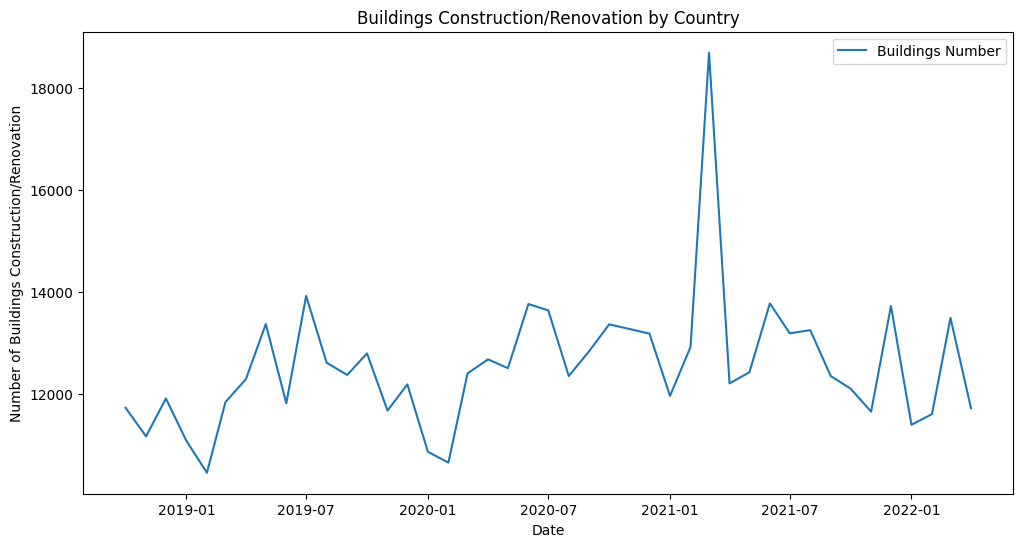

In [ ]:
f.multiple_line_plot(building, 'Number of Buildings Construction/Renovation', 'Buildings Construction/Renovation by Country')

In [ ]:
#building.to_csv("./extra data/buildings_data.csv")